# Principal Component Analysis (PCA)

In [1]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.datasets import fetch_openml
from sklearn import metrics
import tensorflow as tf
from tensorflow.compat.v1.losses import sparse_softmax_cross_entropy

import warnings
warnings.filterwarnings('ignore')

### PCA with the load_digits sklearn dataset

In [2]:
# import dataset of 8x8 pixel images of handwritten digits from 0-9
from sklearn.datasets import load_digits

digits = load_digits()
df = pd.DataFrame(digits.data, columns=digits.feature_names)
print(df.columns)
print(df.shape)
df.head()

Index(['pixel_0_0', 'pixel_0_1', 'pixel_0_2', 'pixel_0_3', 'pixel_0_4',
       'pixel_0_5', 'pixel_0_6', 'pixel_0_7', 'pixel_1_0', 'pixel_1_1',
       'pixel_1_2', 'pixel_1_3', 'pixel_1_4', 'pixel_1_5', 'pixel_1_6',
       'pixel_1_7', 'pixel_2_0', 'pixel_2_1', 'pixel_2_2', 'pixel_2_3',
       'pixel_2_4', 'pixel_2_5', 'pixel_2_6', 'pixel_2_7', 'pixel_3_0',
       'pixel_3_1', 'pixel_3_2', 'pixel_3_3', 'pixel_3_4', 'pixel_3_5',
       'pixel_3_6', 'pixel_3_7', 'pixel_4_0', 'pixel_4_1', 'pixel_4_2',
       'pixel_4_3', 'pixel_4_4', 'pixel_4_5', 'pixel_4_6', 'pixel_4_7',
       'pixel_5_0', 'pixel_5_1', 'pixel_5_2', 'pixel_5_3', 'pixel_5_4',
       'pixel_5_5', 'pixel_5_6', 'pixel_5_7', 'pixel_6_0', 'pixel_6_1',
       'pixel_6_2', 'pixel_6_3', 'pixel_6_4', 'pixel_6_5', 'pixel_6_6',
       'pixel_6_7', 'pixel_7_0', 'pixel_7_1', 'pixel_7_2', 'pixel_7_3',
       'pixel_7_4', 'pixel_7_5', 'pixel_7_6', 'pixel_7_7'],
      dtype='object')
(1797, 64)


,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,...,pixel_6_6,pixel_6_7,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,5.0,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,9.0,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0


In [3]:
# define target values
y = digits.target

In [4]:
# standardize the data
X = StandardScaler().fit_transform(df.loc[:, df.columns].values) # X = StandardScaler().fit_transform(digits.data)
X

array([[ 0.        , -0.33501649, -0.04308102, ..., -1.14664746,
        -0.5056698 , -0.19600752],
       [ 0.        , -0.33501649, -1.09493684, ...,  0.54856067,
        -0.5056698 , -0.19600752],
       [ 0.        , -0.33501649, -1.09493684, ...,  1.56568555,
         1.6951369 , -0.19600752],
       ...,
       [ 0.        , -0.33501649, -0.88456568, ..., -0.12952258,
        -0.5056698 , -0.19600752],
       [ 0.        , -0.33501649, -0.67419451, ...,  0.8876023 ,
        -0.5056698 , -0.19600752],
       [ 0.        , -0.33501649,  1.00877481, ...,  0.8876023 ,
        -0.26113572, -0.19600752]])

In [5]:
# apply PCA with two components
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(X)

In [6]:
# create a dataframe with the principal components and target variable
pca_df = pd.DataFrame(data=principalComponents, columns=['PC1', 'PC2'])
pca_df['target'] = digits.target
pca_df

,PC1,PC2,target
0,1.914215,-0.954449,0
1,0.588977,0.924592,1
2,1.302035,-0.317150,2
3,-3.020782,-0.868771,3
4,4.528939,-1.093404,4
...,...,...,...
1792,0.104347,0.254976,9
1793,2.423241,-1.429605,0
1794,1.022593,-0.147892,8
1795,1.076055,-0.380930,9


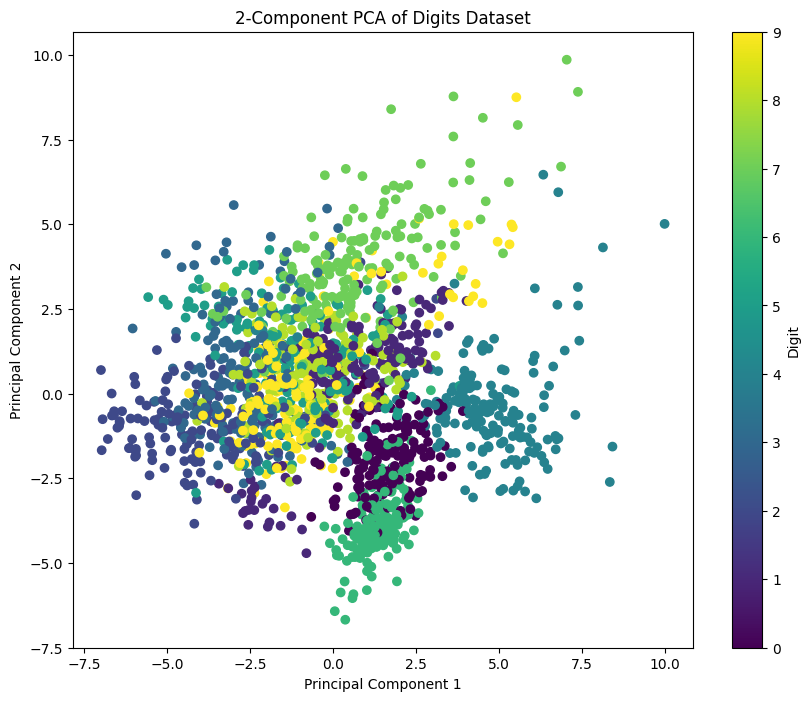

In [7]:
# visualize the 2D projection
plt.figure(figsize=(10, 8))
scatter = plt.scatter(x='PC1', y='PC2', c='target', cmap='viridis', data=pca_df)
plt.colorbar(scatter, label='Digit')
plt.title('2-Component PCA of Digits Dataset')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

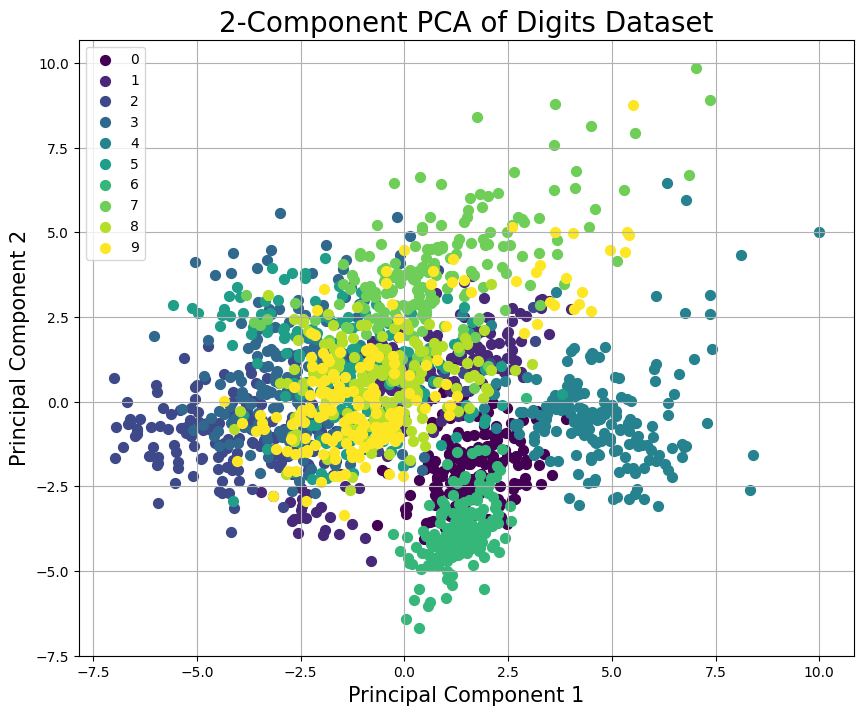

In [8]:
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(1,1,1)
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2-Component PCA of Digits Dataset', fontsize = 20)

targets = pca_df.loc[:, 'target'].unique()
colors = ['#440154', '#482878', '#3e4989', '#31688e', '#26828e',
          '#1f9e89', '#35b779', '#6ece58', '#b5de2b', '#fde725']
for target, color in zip(targets,colors):
    indicesToKeep = pca_df['target'] == target
    ax.scatter(pca_df.loc[indicesToKeep, 'PC1']
               , pca_df.loc[indicesToKeep, 'PC2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()

In [9]:
pca.explained_variance_ratio_

array([0.12033916, 0.09561054])

In [10]:
sum(pca.explained_variance_ratio_)

0.21594970495553054

The two principal components only contain about 22% of the variance in the original dataset, which is low. Next, let's try tuning the `n_components` hyperparameter to get a better total explained variance.

In [11]:
# determine the maximum number of components,
# determined by the minimum of the number of samples or features
max_components = min(X.shape[0], X.shape[1])
max_components

64

In [12]:
# find the n_component value that yields the highest sum of explained_variance_ratio_
explained_variance_ratios = []
for n_components in range(1, max_components + 1):
    pca = PCA(n_components=n_components)
    pca.fit(X)
    explained_variance_ratios.append(np.sum(pca.explained_variance_ratio_))

optimal_n_components = np.argmax(explained_variance_ratios) + 1
print(f"Optimal n_component: {optimal_n_components}")
print(f"Sum of explained_variance_ratio_: {explained_variance_ratios[optimal_n_components - 1]}")

Optimal n_component: 64
Sum of explained_variance_ratio_: 1.0000000000000002


In [13]:
# find the n_component value such that the sum of explained_variance_ratio_ is >=95%
cumulative_explained_variance = np.cumsum(pca.explained_variance_ratio_)
n_components_95_percent = np.argmax(cumulative_explained_variance >= 0.95) + 1
print(f"n_component: {n_components_95_percent}")
print(f"Sum of explained_variance_ratio_: {explained_variance_ratios[n_components_95_percent - 1]}")

n_component: 40
Sum of explained_variance_ratio_: 0.9507372287004187


In [14]:
digits = load_digits()
df = pd.DataFrame(digits.data, columns=digits.feature_names)
y = digits.target
X = StandardScaler().fit_transform(digits.data)

# apply PCA with n_components_95_percent
pca = PCA(n_components=n_components_95_percent)
principalComponents = pca.fit_transform(X)

pca_df = pd.DataFrame(data=principalComponents,
                      columns=[f'PC{i+1}' for i in range(n_components_95_percent)])
pca_df['target'] = digits.target
pca_df

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,PC32,PC33,PC34,PC35,PC36,PC37,PC38,PC39,PC40,target
0,1.914214,-0.954502,-3.946035,2.028722,-0.267175,0.530329,-1.415317,1.496055,0.124911,-0.822259,...,-0.011812,0.038208,-0.004128,0.108848,0.666567,0.119494,0.783373,0.128605,0.239643,0
1,0.588980,0.924636,3.924755,-1.779852,-0.993432,-0.675650,1.878568,0.556331,1.079885,0.087436,...,-1.143616,0.034916,0.360388,-0.678535,-0.033739,-0.233551,0.217871,-0.061899,-0.543957,1
2,1.302039,-0.317189,3.023333,-2.043379,-2.081163,0.935125,-1.296192,1.156151,0.785644,-1.099229,...,0.493537,-1.372703,-0.148108,0.138496,-0.165119,0.547871,-0.408482,-0.812297,0.646510,2
3,-3.020770,-0.868773,-0.801745,-2.187034,-0.556800,0.727117,0.959753,-1.382622,0.259042,0.744589,...,0.862851,0.141707,-0.435786,-0.143019,0.337085,0.262854,0.320330,0.447476,-0.015096,3
4,4.528949,-1.093480,0.973120,-1.419505,-1.715097,1.431586,1.073636,-0.968222,-1.660247,1.174632,...,-0.367464,0.276659,0.540898,-0.246576,-0.522239,-0.213976,-0.185088,-0.215111,0.446116,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1792,0.104331,0.255024,-3.765861,-1.947006,-0.190095,-0.555760,0.531221,0.476475,1.152433,-0.473044,...,-0.510225,-0.322355,0.417379,0.392271,0.421840,0.578889,-0.122801,-0.747017,-0.053532,9
1793,2.423235,-1.429611,-3.045246,2.632090,-0.822897,0.004060,-1.106876,2.330907,0.569446,-1.654163,...,-0.136073,-0.186354,0.064158,-0.166094,0.008706,-0.220537,-0.477326,-0.289604,-0.164689,0
1794,1.022596,-0.147911,2.469974,-0.620310,-0.972050,-0.007372,0.381124,0.529053,2.054726,-2.036868,...,-0.139744,0.029265,0.559849,1.011374,0.064477,-0.476399,0.600441,0.868888,0.792342,8
1795,1.076055,-0.380906,-2.455487,-1.312015,0.253529,-0.638320,1.034474,0.763322,1.077492,-0.334536,...,-0.442864,-0.477645,0.138787,-0.782192,0.541893,0.488309,0.354351,-0.797419,-0.184728,9


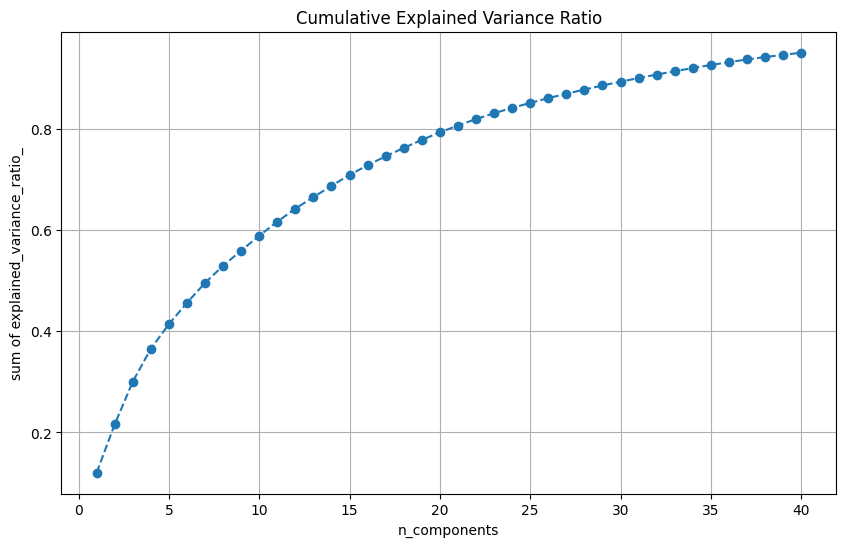

In [15]:
plt.figure(figsize=(10, 6))
plt.plot(range(1, n_components_95_percent + 1),
         np.cumsum(pca.explained_variance_ratio_),
         marker='o', linestyle='--')
plt.title('Cumulative Explained Variance Ratio')
plt.xlabel('n_components')
plt.ylabel('sum of explained_variance_ratio_')
plt.grid(True)
plt.show()

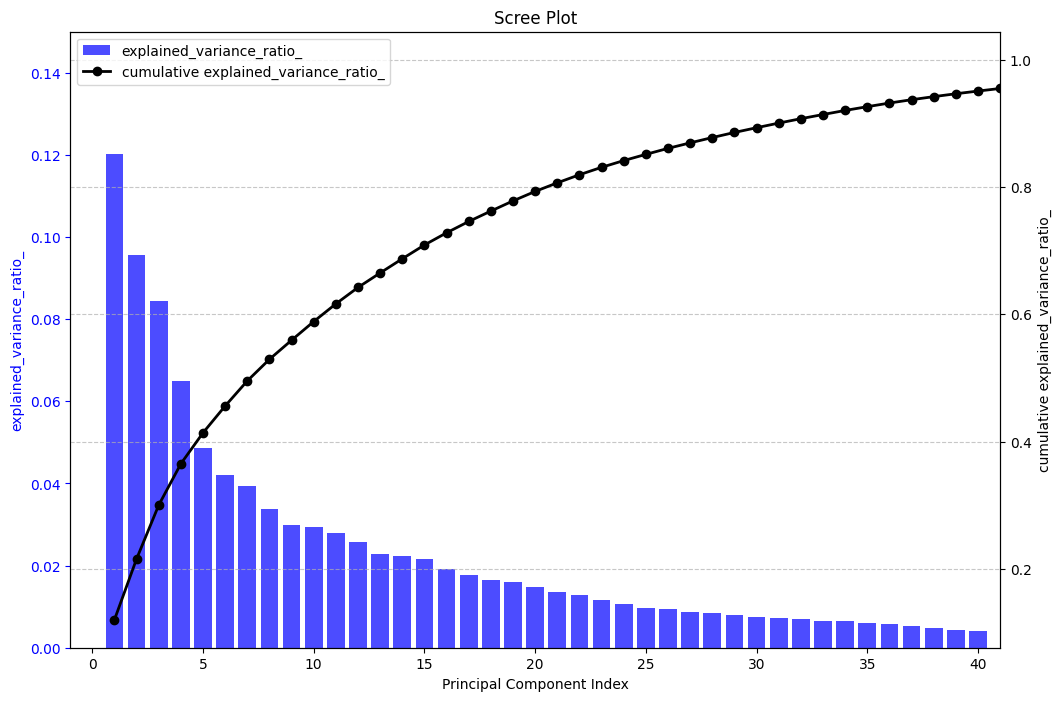

In [16]:
# scree plot with dual y-axes
fig, ax1 = plt.subplots(figsize=(12, 8))
explained_variances = pca.explained_variance_ratio_

# bar chart for explained variance ratio
ax1.bar(range(1, len(explained_variances) + 1),
        explained_variances, color='blue', alpha=0.7, label='explained_variance_ratio_')
ax1.set_xlabel('Principal Component Index')
ax1.set_ylabel('explained_variance_ratio_', color='blue')
ax1.tick_params('y', colors='blue')

# line chart for cumulative explained variance
ax2 = ax1.twinx()
ax2.plot(range(1, len(cumulative_explained_variance) + 1),
         cumulative_explained_variance, color='black',
         marker='o', linestyle='-', linewidth=2,
         label='cumulative explained_variance_ratio_')
ax2.set_ylabel('cumulative explained_variance_ratio_', color='black')
ax2.tick_params('y', colors='black')

ax1.set_xlim(-1, 41)
ax2.set_xlim(-1, 41)
ax1.set_ylim(0, 0.15)


# legend
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines + lines2, labels + labels2, loc='upper left')

plt.title('Scree Plot')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

We can reduce the dimensions from 64 to 40 to still retain 95% of the original dataset's variability.

Now, lets look at `components_` which are the eigenvectors for the transformed data in the new, reduced coordinate space.

In [17]:
pca.components_

array([[ 3.33066907e-16, -1.82233918e-01, -2.85867998e-01, ...,
        -1.03197999e-01, -1.19810607e-01, -7.14936161e-02],
       [ 5.55111512e-17,  4.70270091e-02,  5.95647971e-02, ...,
        -2.42617779e-01, -1.65089261e-01, -7.13292372e-02],
       [ 0.00000000e+00,  2.35882197e-02, -5.67987449e-02, ...,
        -2.22795240e-02,  1.00365590e-01,  9.24458851e-02],
       ...,
       [-9.68303448e-17, -1.83500654e-02,  1.22161879e-01, ...,
        -1.69203587e-01, -1.05894357e-01,  1.06407715e-01],
       [ 1.67421832e-16,  5.77144546e-02, -1.90357073e-01, ...,
        -9.48410073e-02,  1.72505595e-01,  2.37972796e-02],
       [-1.01168292e-16, -1.23997200e-01,  2.38917147e-02, ...,
         1.08607565e-02,  1.12026414e-01, -5.60114094e-02]])

In [18]:
pc_df = pd.DataFrame(data=pca.components_,
                     columns=df.columns)
pc_df.iloc[0:10:,0:10]

,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1
0,3.330669e-16,-0.182234,-0.285868,-0.220370,0.025170,0.009497,0.052476,0.062695,-0.034707,-0.245534
1,5.551115e-17,0.047027,0.059565,-0.020804,0.155903,0.274133,0.249733,0.145832,-0.001027,0.027619
2,0.000000e+00,0.023588,-0.056799,-0.040464,-0.067065,-0.091090,-0.037578,-0.022546,0.002813,-0.050642
3,1.422473e-16,0.178153,0.156129,0.167800,-0.000009,-0.000519,0.043699,0.008749,0.014401,0.124042
4,-1.335737e-16,-0.029978,-0.014666,0.043716,-0.139993,0.007988,0.211222,0.281818,-0.000631,0.006788
5,-1.387779e-17,0.231723,0.119875,-0.100392,-0.093471,-0.082205,0.030190,0.157874,-0.023338,0.065014
6,-1.023487e-16,0.108310,0.004755,-0.233718,0.039540,0.145979,0.036355,-0.098105,0.078248,0.124266
7,-3.382711e-17,-0.125524,-0.006178,0.033409,-0.046161,-0.080329,-0.106751,-0.080032,0.021872,-0.024172
8,-1.255506e-16,-0.213819,-0.120139,0.101893,0.093102,-0.063987,-0.038022,0.158186,0.150700,-0.017302
9,1.127570e-16,0.059834,0.007681,-0.021638,0.005066,-0.164123,-0.187892,-0.065340,0.204883,0.208722


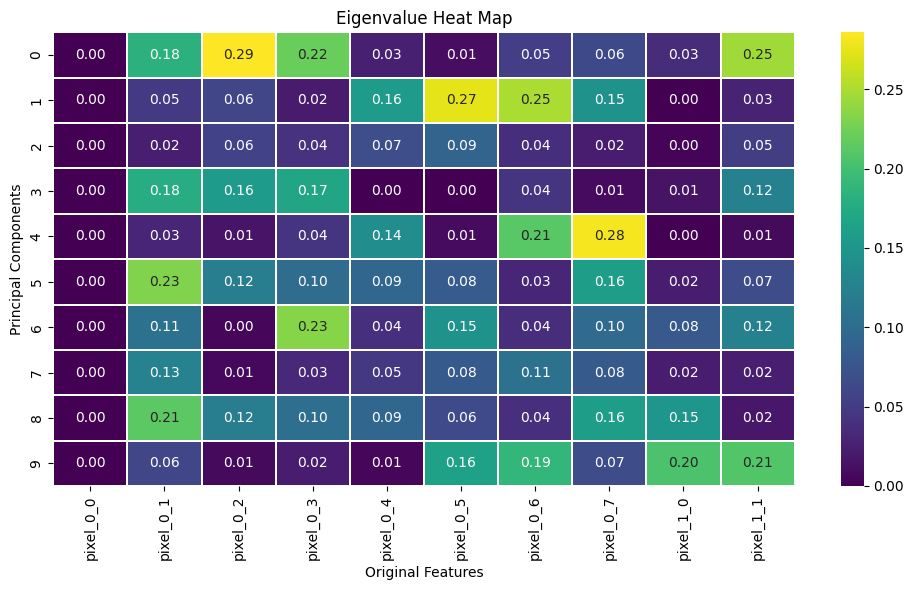

In [19]:
plt.figure(figsize=(10, 6))
sns.heatmap(pc_df.iloc[0:10:,0:10].abs(),
            cmap='viridis', annot=True, fmt='.2f', cbar=True, linewidths=.2)
plt.title('Eigenvalue Heat Map')
plt.xlabel('Original Features')
plt.ylabel('Principal Components')
plt.tight_layout()
plt.show()

Looking at the first 10 principal components and first 10 original features, principal component #0 is the most closely aligned with pixel_0_2 (third feature). The second principal component is most closely aligned with pixel_0_5. PCA might not be the best for feature selection. It's also difficult without knowing exactly which features were used to identify the principal components.

### PCA with the fashion_mnist tensorflow dataset
**PCA and Logistic Regression**

In [20]:
from tensorflow.keras.datasets import fashion_mnist

In [21]:
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

# Flatten the images and normalize pixel values
x_train = x_train.reshape((x_train.shape[0], -1)) / 255.0
x_test = x_test.reshape((x_test.shape[0], -1)) / 255.0

print("x_train shape:", x_train.shape)
print("y_train shape:", y_train.shape)
print("x_test shape:", x_test.shape)
print("y_test shape:", y_test.shape)

4422102/4422102 [==============================] - 0s 0us/step
x_train shape: (60000, 784)
y_train shape: (60000,)
x_test shape: (10000, 784)
y_test shape: (10000,)


In [22]:
# standardize the data
scaler = StandardScaler()

# fit on the training set only
scaler.fit(x_train)

# apply transform to both the training and test set
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)

In [23]:
pca = PCA(.90) # ensure that PCA retains 90% of the data

In [24]:
pca.fit(x_train) # fit PCA on the training set only
pca.n_components_

137

We were able to reduce dimensionality which will reduce the run time of the supervised logistic regression algorithm. With PCA, you can go back to the original dataset with high dimensions from the reduced representation.

In [25]:
# reconstruct the data using inverse_transform
approx = pca.inverse_transform(pca.fit_transform(x_train))
approx.shape

(60000, 784)

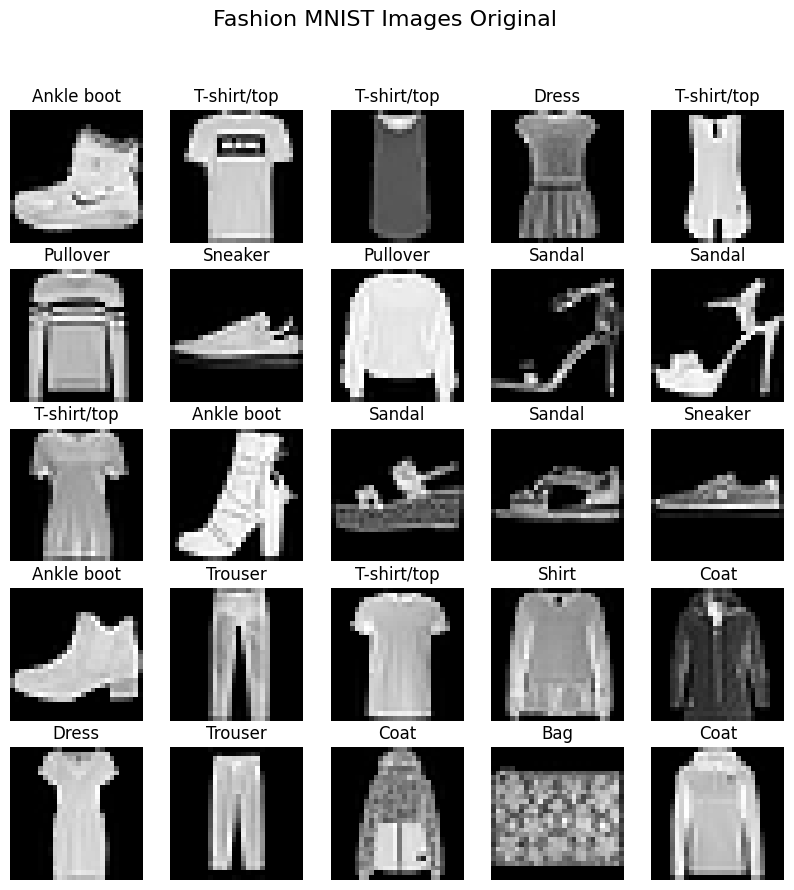

In [26]:
# original dataset visualization
(x_train_orig, y_train_orig), (x_test_orig, y_test_orig) = fashion_mnist.load_data()

class_labels = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

plt.figure(figsize=(10, 10))
plt.suptitle('Fashion MNIST Images Original', fontsize=16)

for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.imshow(x_train_orig[i], cmap='gray')
    plt.title(class_labels[y_train_orig[i]])
    plt.axis('off')

plt.show()

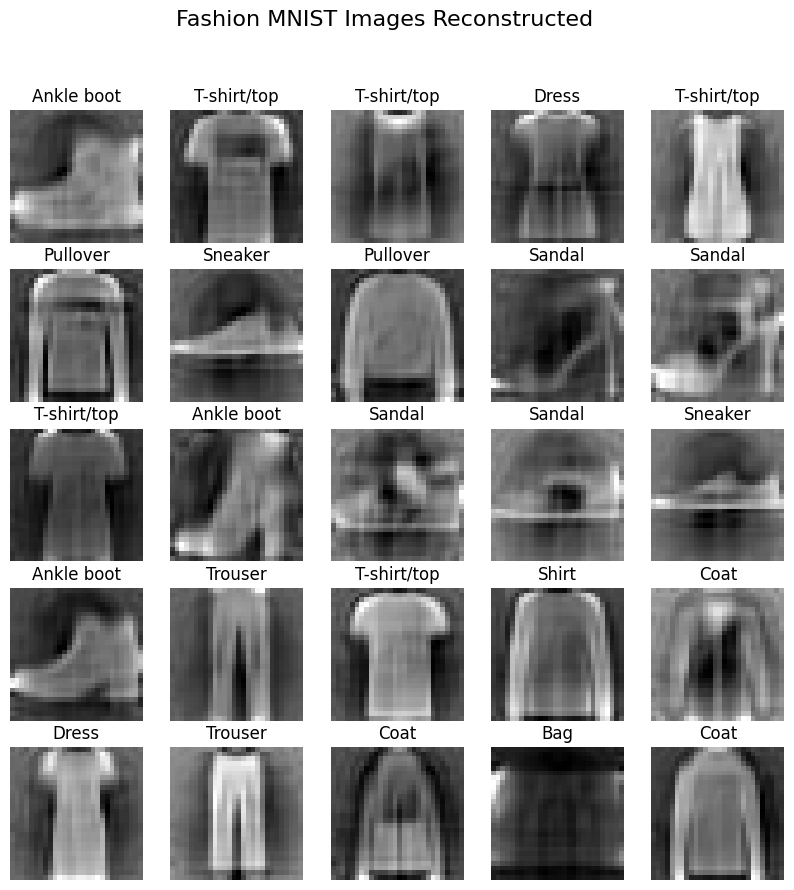

In [27]:
# visualization of the reconstructed dataset (inverse transformed)
approx = approx.reshape((-1, 28, 28))

plt.figure(figsize=(10, 10))
plt.suptitle('Fashion MNIST Images Reconstructed', fontsize=16)

for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.imshow(approx[i], cmap='gray')
    plt.title(class_labels[y_train[i]])
    plt.axis('off')

plt.show()

In [28]:
# apply transform to the training and test set
x_train = pca.transform(x_train)
x_test = pca.transform(x_test)

In [29]:
# make an instance of a logistic regression model
logreg = LogisticRegression(solver = 'lbfgs')

In [30]:
# train the model on the data
logreg.fit(x_train, y_train)

LogisticRegression()

In [31]:
# predict the labels of new data using the information the model learned during training
logreg.predict(x_test)

array([9, 2, 1, ..., 8, 1, 5], dtype=uint8)

In [32]:
# measure the model's performance using accuracy (correct predictions / total data points)
score = logreg.score(x_test, y_test)
score

0.8386

**Comparing explained variances depending on the number of principal components**

In [33]:
pca = PCA() # keep all components
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

x_train = x_train.reshape((x_train.shape[0], -1)) / 255.0
x_test = x_test.reshape((x_test.shape[0], -1)) / 255.0

x_train = scaler.fit_transform(x_train)

x_train_pca = pca.fit_transform(x_train)
pca.n_components_

784

In [34]:
# cumulative explained variance
tot = sum(pca.explained_variance_)
tot

784.013066884443

In [35]:
exp_var = [(i/tot)*100 for i in sorted(pca.explained_variance_, reverse=True)]
cum_exp_var = np.cumsum(exp_var)

print(f"Sum of exp_var: {sum(exp_var)}")
print(f"Length of exp_var: {len(exp_var)}")
print(f"Total explained variance: {sum(cum_exp_var)}")

# exp_var

Sum of exp_var: 100.00000000000007
Length of exp_var: 784
Total explained variance: 74002.98450951766


In [36]:
print(sum(pca.explained_variance_ratio_))
# pca.explained_variance_ratio_

1.0000000000000002


<Figure size 1000x500 with 0 Axes>

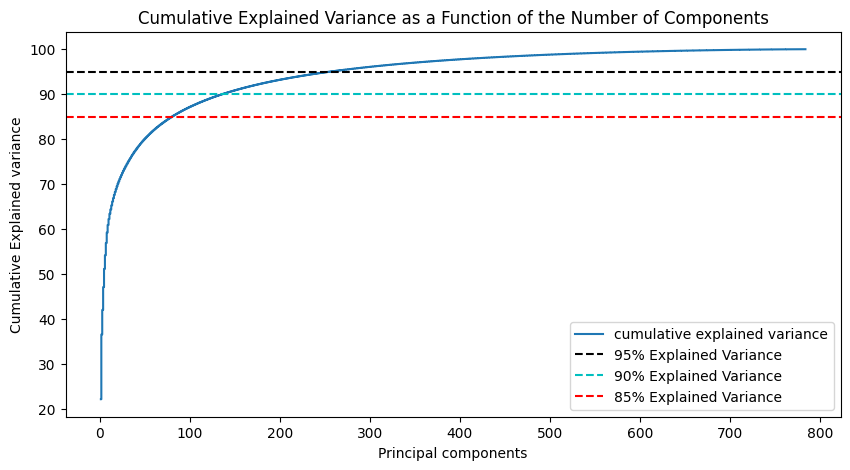

Number of principal componenets needed to retain 95%: 256


In [37]:
# visualize explained variances
plt.figure(figsize=(10, 5))
plt.figure(figsize=(10, 5))
plt.step(range(1, 785), cum_exp_var, where='mid',label='cumulative explained variance')
plt.title('Cumulative Explained Variance as a Function of the Number of Components')
plt.ylabel('Cumulative Explained variance')
plt.xlabel('Principal components')
plt.axhline(y = 95, color='k', linestyle='--', label = '95% Explained Variance')
plt.axhline(y = 90, color='c', linestyle='--', label = '90% Explained Variance')
plt.axhline(y = 85, color='r', linestyle='--', label = '85% Explained Variance')
plt.legend(loc='best')
plt.show()

index_95 = np.argmax(cum_exp_var >= 95) + 1
print(f"Number of principal componenets needed to retain 95%: {index_95}")

In [38]:
num_components_exp_var = [784,
                          np.argmax(cum_exp_var > 99) + 1,
                          np.argmax(cum_exp_var > 95) + 1,
                          np.argmax(cum_exp_var > 90) + 1,
                          np.argmax(cum_exp_var > 85) + 1]
num_components_exp_var

[784, 527, 256, 137, 81]

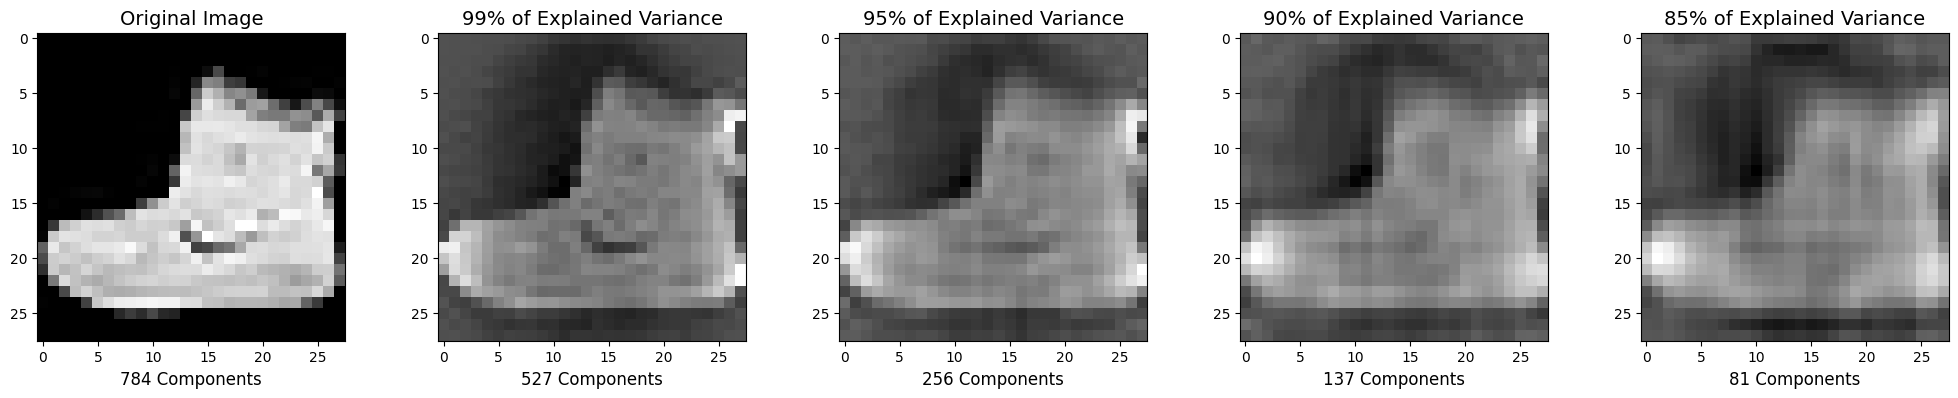

In [40]:
def approx_explained_var(percentage):
    (x_train, y_train), (_, _) = fashion_mnist.load_data()
    x_train = x_train.reshape((x_train.shape[0], -1)) / 255.0
    scaler = StandardScaler()
    scaler.fit(x_train)
    x_train = scaler.transform(x_train)
    pca = PCA(n_components=percentage)
    x_train_pca = pca.fit_transform(x_train)
    approx_original = pca.inverse_transform(x_train_pca)
    return approx_original.reshape((-1, 28, 28))

percentages = [0.99, 0.95, 0.90, 0.85]

def plot_explained_variance(percentages):
    num_percentages = len(percentages)

    plt.figure(figsize=(5 * (num_percentages + 1), 4))

    plt.subplot(1, num_percentages + 1, 1)
    plt.imshow(x_train_orig[0], cmap=plt.cm.gray, interpolation='nearest')
    plt.xlabel('784 Components', fontsize=12)
    plt.title('Original Image', fontsize=14)

    for i, percentage in enumerate(percentages, 1):
        plt.subplot(1, num_percentages + 1, i + 1)
        approx_image = approx_explained_var(percentage)
        plt.imshow(approx_image[0], cmap=plt.cm.gray, interpolation='nearest')
        plt.xlabel(f'{num_components_exp_var[i]} Components', fontsize=12)
        plt.title(f'{percentage * 100:.0f}% of Explained Variance', fontsize=14)

plot_explained_variance(percentages)
plt.show()